In [1]:
!pip show tensorflow
!pip install tensorflow==1.14


Name: tensorflow
Version: 2.2.0rc2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: gast, h5py, keras-preprocessing, numpy, protobuf, astunparse, tensorflow-estimator, wrapt, six, scipy, opt-einsum, wheel, tensorboard, grpcio, termcolor, absl-py, google-pasta
Required-by: fancyimpute
     |████████████████████████████████| 109.2MB 38kB/s 
     |████████████████████████████████| 491kB 50.4MB/s 
     |████████████████████████████████| 3.2MB 45.4MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensor

In [0]:
!pip install -q keras

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install -q keras==2.3.0


In [1]:
# highly overfitted model
# importing libraries 

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 

import matplotlib.pyplot as plt

train_data_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Train'
validation_data_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Test'
#test_data_dir="/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Test"
nb_train_samples =2263
nb_validation_samples = 750
epochs = 10
batch_size = 16
img_width=256
img_height=256
#set early stopping monitor so the model stops training when it won't improve anymore
#early_stopping_monitor = EarlyStopping(patience=5)
#checking format of image i.e checking whether RGB channel coming last or first
if K.image_data_format() == 'channels_first': 
	input_shape = (3, img_width, img_height) 
else: 
	input_shape = (img_width, img_height, 3) 
 
#now creating the model
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
#model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

#now compiling the model
model.compile(loss='binary_crossentropy', 
			optimizer='rmsprop', 
			metrics=['accuracy']) 

# using data generator
train_datagen = ImageDataGenerator( 
	rescale=1. / 255, 
	shear_range=0.2, 
	zoom_range=0.2, 
	horizontal_flip=True) 

test_datagen = ImageDataGenerator(rescale=1. / 255) 

train_generator = train_datagen.flow_from_directory( 
	train_data_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 

validation_generator = test_datagen.flow_from_directory( 
	validation_data_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 
 
hist=model.fit_generator( 
	train_generator, 
	steps_per_epoch=nb_train_samples // batch_size, 
	epochs=epochs, 
	validation_data=validation_generator, 
	validation_steps=nb_validation_samples // batch_size,callbacks=[early_stopping_monitor]) 

#showing loss in form of graph
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
#showing accuracy in form of graph
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


Using TensorFlow backend.


FileNotFoundError: ignored

Found 2263 images belonging to 2 classes.


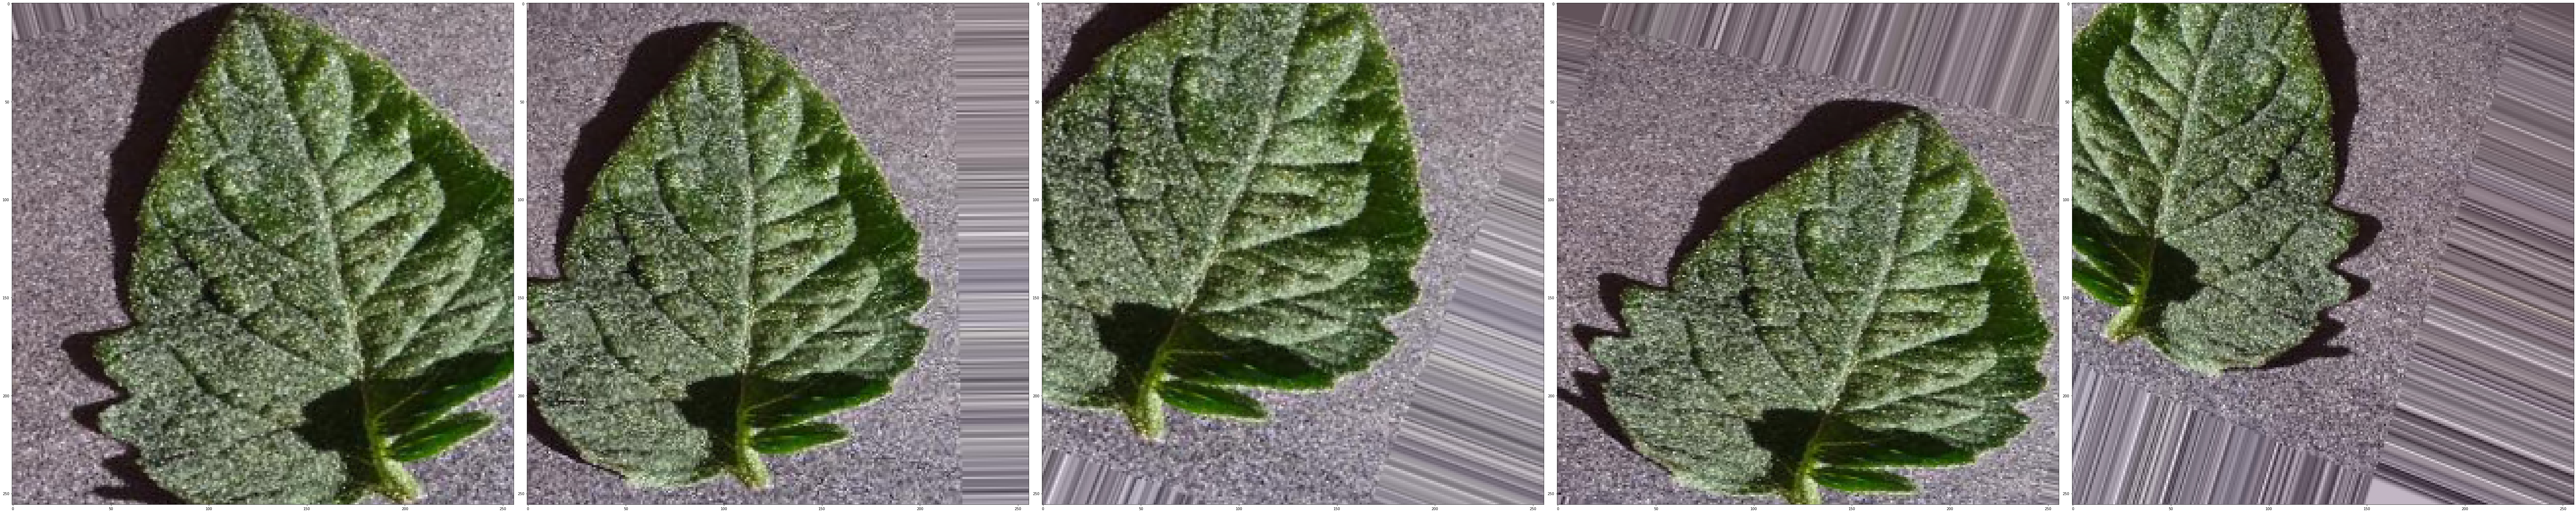

In [4]:
# data augmentation to help us in removing overfitting

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
img_width=256
img_height=256
train_data_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Train'
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(100,100))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img/255)
    plt.tight_layout()
    plt.show()
train_generator = train_datagen.flow_from_directory( 
	train_data_dir, 
	target_size=(img_width, img_height), 
	batch_size=16, 
	)
augmented_images = [train_generator[0][0][0] for i in range(5)]
plotImages(augmented_images)


In [0]:
# tried to reduce overfitting by introducing l2 regularizer and dropout function
# also improved the performance of model using data augmentation
# used adam optimizer
# importing libraries 

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import regularizers
from keras import backend as K 


import matplotlib.pyplot as plt

train_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Train'
validation_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Test'
#test_dir="/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Test"
nb_train_samples =2263
nb_validation_samples = 750
epochs = 10
batch_size = 65
img_width=256
img_height=256
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=5)
#checking format of image i.e checking whether RGB channel coming last or first
if K.image_data_format() == 'channels_first': 
	input_shape = (3, img_width, img_height) 
else: 
	input_shape = (img_width, img_height, 3) 
 
#now creating the model
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64,kernel_regularizer=regularizers.l2(0.7))) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

#now compiling the model
model.compile(loss='binary_crossentropy', 
			optimizer='adam', 
			metrics=['accuracy']) 

# using data generator
train_datagen = ImageDataGenerator( 
	rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True) 

test_datagen = ImageDataGenerator(rescale=1. / 255) 

train_generator = train_datagen.flow_from_directory( 
	train_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 

validation_generator = test_datagen.flow_from_directory( 
	validation_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 

hist=model.fit_generator( 
	train_generator, 
	steps_per_epoch=nb_train_samples // batch_size, 
	epochs=epochs, 
	validation_data=validation_generator, 
	validation_steps=nb_validation_samples // batch_size,callbacks=[early_stopping_monitor]) 
#showing loss in form of graph
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
#showing accuracy in form of graph
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [0]:
# tried to reduce overfitting by introducing l2 regularizer and dropout function
# also improved the performance of model using data augmentation
# used SGD optimizer
# importing libraries 

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import regularizers
from keras import backend as K 


import matplotlib.pyplot as plt

train_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Train'
validation_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Test'
#test_dir="/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Test"
nb_train_samples =2263
nb_validation_samples = 750
epochs = 10
batch_size = 65
img_width=256
img_height=256
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=5)
#checking format of image i.e checking whether RGB channel coming last or first
if K.image_data_format() == 'channels_first': 
	input_shape = (3, img_width, img_height) 
else: 
	input_shape = (img_width, img_height, 3) 
 
#now creating the model
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64,kernel_regularizer=regularizers.l2(0.7))) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

#now compiling the model
model.compile(loss='binary_crossentropy', 
			optimizer='SGD', 
			metrics=['accuracy']) 

# using data generator
train_datagen = ImageDataGenerator( 
	rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True) 

test_datagen = ImageDataGenerator(rescale=1. / 255) 

train_generator = train_datagen.flow_from_directory( 
	train_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 

validation_generator = test_datagen.flow_from_directory( 
	validation_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 

hist=model.fit_generator( 
	train_generator, 
	steps_per_epoch=nb_train_samples // batch_size, 
	epochs=epochs, 
	validation_data=validation_generator, 
	validation_steps=nb_validation_samples // batch_size,callbacks=[early_stopping_monitor]) 
#showing loss in form of graph
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
#showing accuracy in form of graph
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [0]:
# tried to reduce overfitting by introducing l2 regularizer and dropout function
# also improved the performance of model using data augmentation
# used adam optimizer with learning rate 0.01
# importing libraries 

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import regularizers
from keras.optimizers import adam
from keras import backend as K 


import matplotlib.pyplot as plt

train_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Train'
validation_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Test'
#test_dir="/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Test"
nb_train_samples =2263
nb_validation_samples = 750
epochs = 10
batch_size = 65
img_width=256
img_height=256
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=5)
#checking format of image i.e checking whether RGB channel coming last or first
if K.image_data_format() == 'channels_first': 
	input_shape = (3, img_width, img_height) 
else: 
	input_shape = (img_width, img_height, 3) 
 
#now creating the model
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64,kernel_regularizer=regularizers.l2(0.7))) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

#now compiling the model
opt=adam(lr=0.01)
model.compile(loss='binary_crossentropy', 
			optimizer=opt, 
			metrics=['accuracy']) 

# using data generator
train_datagen = ImageDataGenerator( 
	rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True) 

test_datagen = ImageDataGenerator(rescale=1. / 255) 

train_generator = train_datagen.flow_from_directory( 
	train_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 

validation_generator = test_datagen.flow_from_directory( 
	validation_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 

hist=model.fit_generator( 
	train_generator, 
	steps_per_epoch=nb_train_samples // batch_size, 
	epochs=epochs, 
	validation_data=validation_generator, 
	validation_steps=nb_validation_samples // batch_size,callbacks=[early_stopping_monitor]) 
#showing loss in form of graph
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
#showing accuracy in form of graph
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [0]:
# tried to reduce overfitting by introducing l2 regularizer and dropout function
# also improved the performance of model using data augmentation
# used adam optimizer with learning rate 0.005
# importing libraries 

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import regularizers
from keras.optimizers import adam
from keras import backend as K 


import matplotlib.pyplot as plt

train_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Train'
validation_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Test'
#test_dir="/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Test"
nb_train_samples =2263
nb_validation_samples = 750
epochs = 10
batch_size = 65
img_width=256
img_height=256
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=5)
#checking format of image i.e checking whether RGB channel coming last or first
if K.image_data_format() == 'channels_first': 
	input_shape = (3, img_width, img_height) 
else: 
	input_shape = (img_width, img_height, 3) 
 
#now creating the model
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64,kernel_regularizer=regularizers.l2(0.7))) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

#now compiling the model
opt=adam(lr=0.005)
model.compile(loss='binary_crossentropy', 
			optimizer=opt, 
			metrics=['accuracy']) 

# using data generator
train_datagen = ImageDataGenerator( 
	rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True) 

test_datagen = ImageDataGenerator(rescale=1. / 255) 

train_generator = train_datagen.flow_from_directory( 
	train_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 

validation_generator = test_datagen.flow_from_directory( 
	validation_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 

hist=model.fit_generator( 
	train_generator, 
	steps_per_epoch=nb_train_samples // batch_size, 
	epochs=epochs, 
	validation_data=validation_generator, 
	validation_steps=nb_validation_samples // batch_size,callbacks=[early_stopping_monitor]) 
#showing loss in form of graph
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
#showing accuracy in form of graph
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [0]:
# tried to reduce overfitting by introducing l2 regularizer and dropout function
# also improved the performance of model using data augmentation
# used adam optimizer with learning rate 0.1
# importing libraries 

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import regularizers
from keras.optimizers import adam
from keras import backend as K 


import matplotlib.pyplot as plt

train_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Train'
validation_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Test'
#test_dir="/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Test"
nb_train_samples =2263
nb_validation_samples = 750
epochs = 10
batch_size = 65
img_width=256
img_height=256
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=5)
#checking format of image i.e checking whether RGB channel coming last or first
if K.image_data_format() == 'channels_first': 
	input_shape = (3, img_width, img_height) 
else: 
	input_shape = (img_width, img_height, 3) 
 
#now creating the model
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64,kernel_regularizer=regularizers.l2(0.7))) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

#now compiling the model
opt=adam(lr=0.1)
model.compile(loss='binary_crossentropy', 
			optimizer=opt, 
			metrics=['accuracy']) 

# using data generator
train_datagen = ImageDataGenerator( 
	rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True) 

test_datagen = ImageDataGenerator(rescale=1. / 255) 

train_generator = train_datagen.flow_from_directory( 
	train_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 

validation_generator = test_datagen.flow_from_directory( 
	validation_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 

hist=model.fit_generator( 
	train_generator, 
	steps_per_epoch=nb_train_samples // batch_size, 
	epochs=epochs, 
	validation_data=validation_generator, 
	validation_steps=nb_validation_samples // batch_size,callbacks=[early_stopping_monitor]) 
#showing loss in form of graph
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
#showing accuracy in form of graph
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
